In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, max_error

In [16]:
class LibsLeastSquaresRegression:
    def __init__(self, days=0, views=0, downloads=0):
        if os.path.exists('site_data.csv'):
            # Если CSV существует, загружаем данные из него
            self.df = pd.read_csv('site_data.csv')
            self.days = np.array(self.df['День'])
            self.views = np.array(self.df['Посещения'])
            self.downloads = np.array(self.df['Скачивания'])
        else:
            # Если CSV нет, создаем DataFrame из переданных данных
            self.days = np.array(days)
            self.views = np.array(views)
            self.downloads = np.array(downloads)
            self.df = pd.DataFrame({'День': self.days, 'Посещения': self.views, 'Скачивания': self.downloads})
            self.df.to_csv('site_data.csv', index=False)
    
    def mean(self, values):
        """Вычисляет среднее значение списка чисел."""
        return np.mean(values)

    def variance(self, values):
        """Вычисляет дисперсию - среднеквадратичное отклонение значений относительно среднего.
        Чем больше дисперсия, тем сильнее разброс данных относительно их среднего значения."""
        return np.var(values)
    
    def correlation(self, x, y):
        """Вычисляет коэффициент корреляции - нормированную меру линейной зависимости между двумя переменными.
        Принимает значения от -1 до 1: 
        - 1 означает сильную положительную зависимость,
        - -1 означает сильную отрицательную зависимость,
        - 0 означает отсутствие линейной зависимости."""
        return np.corrcoef(x, y)[0, 1]
    
    def plot_graphs(self):
        """Строит графики линейной регрессии."""
        sns.scatterplot(x=self.views, y=self.downloads)
        model = LinearRegression().fit(self.views.reshape(-1, 1), self.downloads)
        predictions = model.predict(self.views.reshape(-1, 1))
        plt.plot(self.views, predictions, color='red', label='Линейная регрессия y = 1.79x + 0.01')
        plt.xlabel('Посещения сайта')
        plt.ylabel('Скачивания')
        plt.legend()
        plt.grid()
        plt.title('Регрессия: посещения -> скачивания')
        plt.show()
    
    def sklearn_regression(self):
        """Построение модели линейной регрессии средствами Scikit-Learn."""
        model = LinearRegression()
        x = self.views.reshape(-1, 1)
        y = self.downloads
        model.fit(x, y)
        y_pred = model.predict(x)
        
        # Вывод коэффициентов модели
        print(f'Коэффициенты sklearn: a = {model.intercept_:.2f}, b = {model.coef_[0]:.2f}')
        
        # Оценка качества модели
        print("Метрики качества модели:")
        # Показывает, насколько хорошо модель объясняет данные (1 - идеальная модель, 0 - случайность)
        print(f'Коэффициент детерминации R^2: {r2_score(y, y_pred):.2f}') 
        # Наибольшее отклонение предсказания от реального значения
        print(f'Максимальная остаточная ошибка (MRE): {max_error(y, y_pred):.2f}')
        # Средняя разница между предсказанными и фактическими значениями
        print(f'Средняя абсолютная ошибка (MAE): {mean_absolute_error(y, y_pred):.2f}') 
        # Оценка разброса ошибок, квадрат средних отклонений
        print(f'Среднеквадратичная ошибка (MSE): {mean_squared_error(y, y_pred):.2f}') 
        # Медиана всех абсолютных ошибок
        print(f'Медианная абсолютная ошибка (Median AE): {median_absolute_error(y, y_pred):.2f}') 
        # Показывает среднюю ошибку в процентах от реальных значений
        print(f'Средняя абсолютная процентная ошибка (MAPE): {mean_absolute_percentage_error(y, y_pred):.2f}') 


## Подготовка данных:

In [17]:
days = range(1, 11)
views = np.array([5252, 7620, 941, 1159, 485, 299, 239, 195, 181, 180])
downloads = np.array([21, 46, 9, 8, 3, 6, 4, 2, 2, 2])

## Инициализация класса и вывод таблицы данных:

In [18]:
regression = LibsLeastSquaresRegression()

print("Таблица данных:")
print(regression.df)

Таблица данных:
   День  Посещения  Скачивания
0     1       5252          21
1     2       7620          46
2     3        941           9
3     4       1159           8
4     5        485           3
5     6        299           6
6     7        239           4
7     8        195           2
8     9        181           2
9    10        180           2


## Вывод статистики:

In [19]:
print("\nСводные статистики (NumPy):")
print(f'Среднее посещений: {np.mean(views):.2f}, Среднее скачиваний: {np.mean(downloads):.2f}')
print(f'Станд. отклонение посещений: {np.std(views):.2f}, Скачиваний: {np.std(downloads):.2f}')
print(f'Дисперсия посещений: {np.var(views):.2f}, Дисперсия скачиваний: {np.var(downloads):.2f}')
print(f'Мин/Макс посещений: {np.min(views)}, {np.max(views)}')
print(f'Мин/Макс скачиваний: {np.min(downloads)}, {np.max(downloads)}')

print("\nКоэффициент корреляции:")
print(f'{regression.correlation(views, downloads):.2f}')


Сводные статистики (NumPy):
Среднее посещений: 1655.10, Среднее скачиваний: 10.30
Станд. отклонение посещений: 2469.17, Скачиваний: 13.09
Дисперсия посещений: 6096803.89, Дисперсия скачиваний: 171.41
Мин/Макс посещений: 180, 7620
Мин/Макс скачиваний: 2, 46

Коэффициент корреляции:
0.97


## Построение графика регрессии:

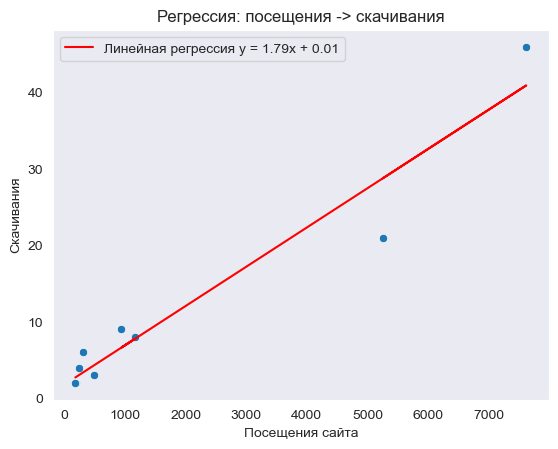

Коэффициенты sklearn: a = 1.79, b = 0.01
Метрики качества модели:
Коэффициент детерминации R^2: 0.94
Максимальная остаточная ошибка (MRE): 7.79
Средняя абсолютная ошибка (MAE): 2.26
Среднеквадратичная ошибка (MSE): 10.32
Медианная абсолютная ошибка (Median AE): 1.13
Средняя абсолютная процентная ошибка (MAPE): 0.30


In [20]:
regression.plot_graphs()
regression.sklearn_regression()

#### $R^2$ - хороший результат, это значит, что модель может предсказать 94% данных

#### Ошибки модели (MAE, MSE, Median AE) находятся на приемлемом уровне, но максимальная ошибка (MRE = 7.79) указывает на наличие выбросов или сложных случаев, которые модель плохо предсказывает.

#### MAPE = 0.30 (30%) — это относительно высокая ошибка в процентах, что может быть важно, если точность в процентах критична для задачи.

## Вычисление и вывод прогнозов:

In [21]:
x_pred_8000 = np.array([[8000]])
model = LinearRegression().fit(views.reshape(-1, 1), downloads)
y_pred_8000 = model.predict(x_pred_8000)
print(f'Прогноз для 8000 посещений: {y_pred_8000[0]:.2f} скачиваний')

y_pred_500 = 500
x_pred_500 = (y_pred_500 - model.intercept_) / model.coef_[0]
print(f'Для 500 скачиваний требуется примерно {x_pred_500:.2f} посещений')

Прогноз для 8000 посещений: 42.91 скачиваний
Для 500 скачиваний требуется примерно 96921.70 посещений
